In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import random

(60000, 28, 28)
(10000, 28, 28)


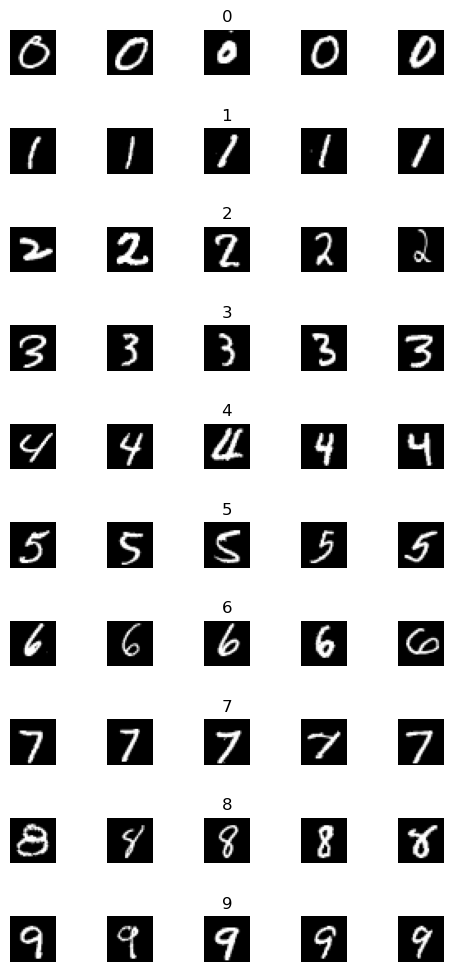

In [2]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
num_of_samples=[]

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


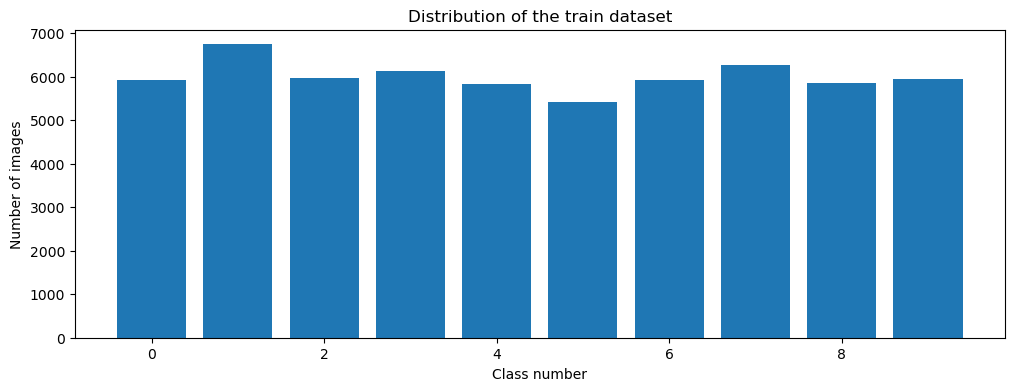

In [3]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)#added depth of 1
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [5]:
def leNet_model():
  model =Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu' ))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())

  model.add(Dense(500, activation='relu'))######
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [6]:
model = leNet_model()
print(model.summary())

c:\Users\3omd4\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 15)     │         4,065 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 15)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 375)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       188,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
history =model.fit(X_train, y_train, epochs= 10, validation_split=0.1, batch_size= 400, verbose=1, shuffle= 1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8333 - loss: 0.4957 - val_accuracy: 0.9810 - val_loss: 0.0640
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9846 - loss: 0.0514 - val_accuracy: 0.9853 - val_loss: 0.0543
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9875 - loss: 0.0404 - val_accuracy: 0.9870 - val_loss: 0.0472
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9904 - loss: 0.0288 - val_accuracy: 0.9873 - val_loss: 0.0498
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9916 - loss: 0.0250 - val_accuracy: 0.9877 - val_loss: 0.0539
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9898 - val_loss: 0.0438
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9940 - loss: 0.0173 - val_accuracy: 0.9888 - val_loss: 0.0456
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accu

Text(0.5, 0, 'epochs')

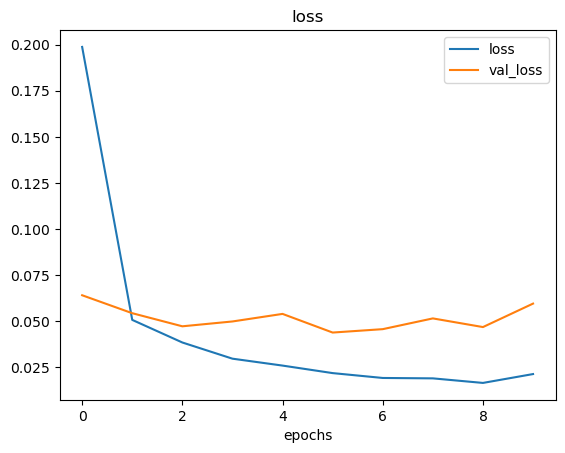

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

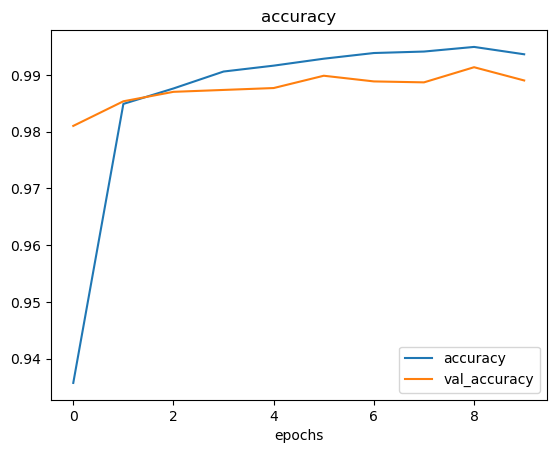

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [20]:
import requests
from PIL import Image
import cv2


def test_model(url):
    
    response = requests.get(url, stream=True)
    print(response)#200 is a successful get request
    img = Image.open(response.raw)
    plt.imshow(img)

    img_arr=np.asarray(img)
    resized = cv2.resize(img_arr, (28, 28))
    gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    image = cv2.bitwise_not(gray_scale)

    #normalizing and flatting before recongition
    image = image /255
    image = image.reshape(1, 28, 28, 1)

    predictions = model.predict(image)
    predicted_classes = np.argmax(predictions, axis=1)
    print("prediction digits: ", str(predicted_classes))

<Response [200]>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
prediction digits:  [3]


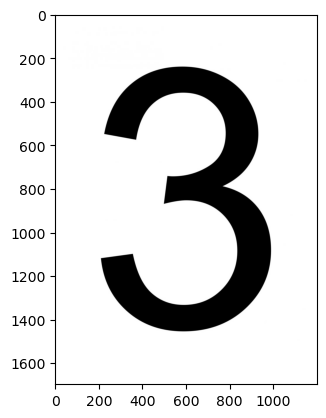

In [21]:
test_model('https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg')

<Response [200]>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
prediction digits:  [2]


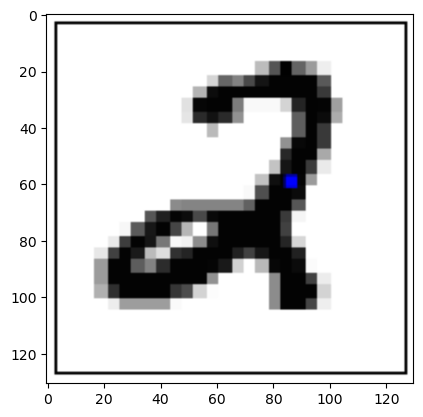

In [22]:
test_model('https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png')